In [ ]:
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import pyperclip

import re
import time
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import seaborn as sns

import koreanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

font_path = '/Users/jieunlee/Documents/3_TECH!T_202305/TECH!T_dataton/nanum-barun-gothic/NanumBarunGothic.ttf'  # 각자 경로에 맞게
fontprop = fm.FontProperties(fname=font_path, size=18)

# **Text Analysis**

### **LDA Topic Modeling**

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
processed_data = [hastags for hastags in df_copy.loc[df_copy['해시태그(한국)'].notnull(), '해시태그(한국)']]
processed_data = pd.DataFrame(processed_data)
# processed_data[0] = processed_data[0].replace("", np.nan)
# processed_data = processed_data[processed_data[0].notnull()]
processed_data = processed_data.values.tolist()
processed_data2=[]
for i in processed_data:
    i = list(filter(None, i))
    processed_data2.append(i)
processed_data = processed_data2
processed_data

[['액션', '재벌', '학원로맨스'],
 ['로맨스', '고자극로맨스', '궁중로맨스', '까칠남', '소설원작', '성인웹툰'],
 ['드라마'],
 ['액션', '서바이벌', '사이다', '게임판타지', '두뇌싸움', '먼치킨', '머니게임'],
 ['로맨스', '고자극로맨스', '서스펜스', '로판', '감성드라마', '성인웹툰'],
 ['순정'],
 ['액션', '지금추천작', '범죄'],
 ['무협/사극', '지금추천작', '힘숨찐', '판무', '소설원작'],
 ['판타지', '레드아이스 스튜디오', '차원이동', '아포칼립스', '소설원작'],
 ['로맨스', '육아물', '빙의', '로판', '소설원작'],
 ['로맨스', '현실로맨스', '오피스로맨스', '연상연하', '사내연애', '소설원작'],
 ['드라마', '성별반전', '궁중로맨스', '동양풍판타지', '걸크러시'],
 ['판타지', '소설원작'],
 ['액션', '게임판타지', '이능력배틀물'],
 ['순정'],
 ['로맨스', '해외작품'],
 ['순정'],
 ['판타지', '지금추천작', '소설원작'],
 ['드라마', '레드스트링', '연예계', '완결드라마'],
 ['판타지', '동물', '완결판타지'],
 ['로맨스', '오피스로맨스', '사내연애', '소설원작', '완결로맨스'],
 ['순정'],
 ['액션', '학원물'],
 ['판타지', '2021 지상최대공모전', '게임판타지', '먼치킨'],
 ['스릴러', '완결스릴러'],
 ['판타지', '레드아이스 스튜디오', '게임판타지'],
 ['판타지', '히어로', '연예계'],
 ['액션', '슈퍼스트링', '이능력배틀물', '먼치킨'],
 ['판타지', '슈퍼스트링', '아포칼립스', 'sf', '먼치킨', '감염'],
 ['판타지', '사이다', '회귀', '헌터물', '먼치킨', '소설원작'],
 ['소년'],
 ['소년'],
 ['BL'],
 ['로맨스', '로판', '소설원작'],
 ['로맨스', '차원이

In [ ]:
# BOW 생성을 위한 고유한 단어들의 사전
# 사전 : 단어 + 고유번호 정보
dictionary = corpora.Dictionary(processed_data)

2023-09-20 16:05:52,401 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-09-20 16:05:52,406 : INFO : built Dictionary<147 unique tokens: ['액션', '재벌', '학원로맨스', '고자극로맨스', '궁중로맨스']...> from 593 documents (total 1886 corpus positions)
2023-09-20 16:05:52,408 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<147 unique tokens: ['액션', '재벌', '학원로맨스', '고자극로맨스', '궁중로맨스']...> from 593 documents (total 1886 corpus positions)", 'datetime': '2023-09-20T16:05:52.408575', 'gensim': '4.3.1', 'python': '3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) \n[Clang 14.0.6 ]', 'platform': 'macOS-13.4-arm64-arm-64bit', 'event': 'created'}


In [ ]:
# 빈도가 2 이상인 단어 + 전체의 50%로 이상 차지하는 단어 필터링
dictionary.filter_extremes(no_below=2, no_above=0.5)

2023-09-20 16:05:54,247 : INFO : discarding 13 tokens: [('2021 최강자전', 1), ('레트로', 1), ('스핀오프', 1), ('영화원작웹툰', 1), ('두뇌싸움', 1), ('음악', 1), ('법정드라마', 1), ('2022 지상최대공모전', 1), (' 완결로맨스', 1), ('축구', 1)]...
2023-09-20 16:05:54,249 : INFO : keeping 134 tokens which were in no less than 2 and no more than 296 (=50.0%) documents
2023-09-20 16:05:54,250 : INFO : resulting dictionary: Dictionary<134 unique tokens: ['액션', '재벌', '학원로맨스', '고자극로맨스', '궁중로맨스']...>


In [ ]:
# 사전 속 단어 빈도 벡터화 => "BOW"
corpus = [dictionary.doc2bow(text) for text in processed_data]

In [ ]:
num_topics = 5
chunksize = 2000
passes = 20
iterations = 1000
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2023-09-20 16:06:04,210 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2023-09-20 16:06:04,212 : INFO : using serial LDA version on this node
2023-09-20 16:06:04,214 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 593 documents, updating model once every 593 documents, evaluating perplexity every 0 documents, iterating 1000x with a convergence threshold of 0.001000
2023-09-20 16:06:04,215 : INFO : PROGRESS: pass 0, at document #593/593
2023-09-20 16:06:04,274 : INFO : optimized alpha [0.1838566, 0.17080818, 0.1947486, 0.15602551, 0.18445869]
2023-09-20 16:06:04,275 : INFO : topic #0 (0.184): 0.091*"스릴러" + 0.084*"완결스릴러" + 0.080*"액션" + 0.054*"소설원작" + 0.047*"드라마&영화 원작웹툰" + 0.039*"드라마" + 0.034*"로맨스" + 0.033*"완결드라마" + 0.025*"학원물" + 0.023*"아포칼립스"
2023-09-20 16:06:04,275 : INFO : topic #1 (0.171): 0.120*"로맨스" + 0.119*"로판" + 0.087*"소설원작" + 0.043*"BL" + 0.030*"완결로맨스" + 0.028*"걸크러시" + 0.022*"궁중로맨스" + 0.020*"빙의" + 0.017*"

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -13.0851.
[([(0.1479021, '로맨스'),
   (0.11338045, '소설원작'),
   (0.09615466, '로판'),
   (0.054519895, 'BL'),
   (0.033928238, '완결로맨스'),
   (0.026032288, '오피스로맨스'),
   (0.025381953, '걸크러시'),
   (0.024258649, '선결혼후연애'),
   (0.02392265, '계약연애'),
   (0.023448622, '직진남'),
   (0.022019269, '빙의'),
   (0.020250192, '2030연애'),
   (0.019040223, '연상연하'),
   (0.018990163, '사내연애'),
   (0.018927949, '이세계'),
   (0.018641865, '고자극로맨스'),
   (0.017066658, '궁중로맨스'),
   (0.017049743, '구원서사'),
   (0.01676646, '회귀'),
   (0.01489416, '까칠남')],
  -10.242334880207775),
 ([(0.18194473, '로맨스'),
   (0.14151065, '완결로맨스'),
   (0.10653478, '드라마'),
   (0.06065035, '완결드라마'),
   (0.047657408, '소설원작'),
   (0.032316033, '드라마&영화 원작웹툰'),
   (0.028798668, '삼각관계'),
   (0.026883801, '학원로맨스'),
   (0.020522846, '하이틴'),
   (0.018284572, '직업드라마'),
   (0.017163308, '완결개그'),
   (0.017163303, '개그'),
   (0.016821347, '캠퍼스로맨스'),
   (0.0154198585, '인플루언서'),
   (0.014904052, '완결무료'),
   (0.013791652, '청춘로맨스'),
   (0.

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'hastags_5topcics_230920.html')

### **Wordcloud based on LDA Topic Modeling**

In [ ]:
for i, top in enumerate(top_topics):
    top = top[0]
    globals()[f'topic{i+1}'] = [t[1] for t in top]
    print(globals()[f'topic{i+1}'])

['로맨스', '소설원작', '로판', 'BL', '완결로맨스', '오피스로맨스', '걸크러시', '선결혼후연애', '계약연애', '직진남', '빙의', '2030연애', '연상연하', '사내연애', '이세계', '고자극로맨스', '궁중로맨스', '구원서사', '회귀', '까칠남']
['로맨스', '완결로맨스', '드라마', '완결드라마', '소설원작', '드라마&영화 원작웹툰', '삼각관계', '학원로맨스', '하이틴', '직업드라마', '완결개그', '개그', '캠퍼스로맨스', '인플루언서', '완결무료', '청춘로맨스', '성장드라마', '하이퍼리얼리즘', '인외존재', '최강자전']
['액션', '완결액션', '학원물', '먼치킨', '이능력배틀물', '복수극', '사이다', '게임판타지', '지금추천작', '소년왕도물', '힘숨찐', '느와르', '슈퍼스트링', '히어로', '스포츠성장', '세계관', '2019 지상최대공모전', '다크히어로', '회귀', '스포츠']
['스릴러', '완결스릴러', '드라마', '완결드라마', '드라마&영화 원작웹툰', '성인웹툰', '아포칼립스', '서스펜스', '감성드라마', '완결무료', '블루스트링', '일상', '완결일상', '좀비', '2020 지상최대공모전', '괴담', '슈퍼스트링', '감염', '판무', '사이다']
['판타지', '순정', '완결판타지', '소설원작', '먼치킨', '연예계', '게임판타지', '소년', '아이돌', '헌터물', '아포칼립스', '레드아이스 스튜디오', '사이다', '회귀', '최강자전', '소년왕도물', '성인웹툰', '고인물', '뱀파이어', '무협/사극']


In [ ]:
list_ = []

for i, topics in enumerate(top_topics):
    globals()[f'#{i+1}'] = topics[0]
    list_.append(globals()[f'#{i+1}'])

/opt/homebrew/Caskroom/miniforge/base/envs/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
2023-09-20 22:47:11,079 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,080 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,081 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,082 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,082 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,083 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,084 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11

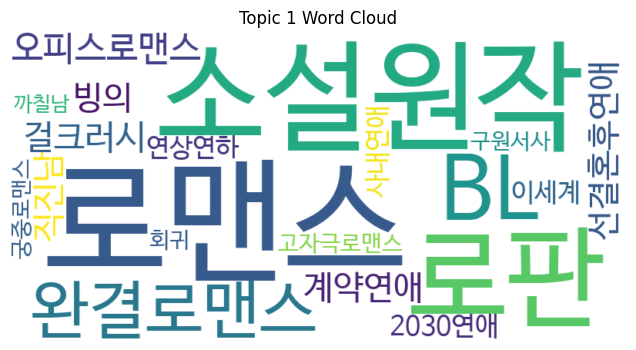

/opt/homebrew/Caskroom/miniforge/base/envs/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
2023-09-20 22:47:11,269 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,269 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,270 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,271 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,272 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,272 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,273 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11

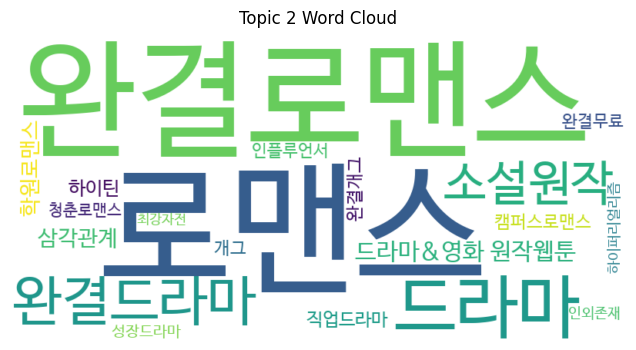

/opt/homebrew/Caskroom/miniforge/base/envs/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
2023-09-20 22:47:11,443 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,444 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,444 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,445 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,446 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,446 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,447 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11

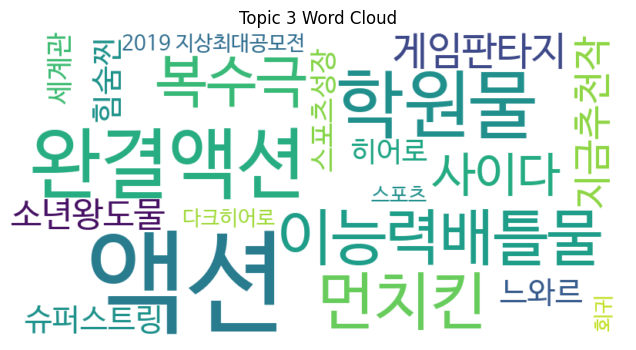

/opt/homebrew/Caskroom/miniforge/base/envs/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
2023-09-20 22:47:11,678 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,678 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,679 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,679 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,680 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,681 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,681 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11

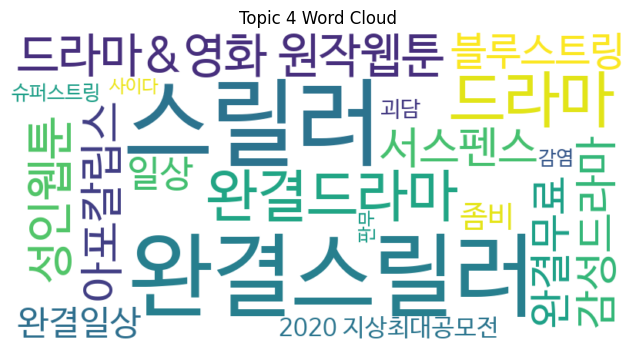

/opt/homebrew/Caskroom/miniforge/base/envs/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
2023-09-20 22:47:11,864 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,865 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,865 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,866 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,866 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,867 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11,868 : WARNING : findfont: Font family 'NanumBarunGothic' not found.
2023-09-20 22:47:11

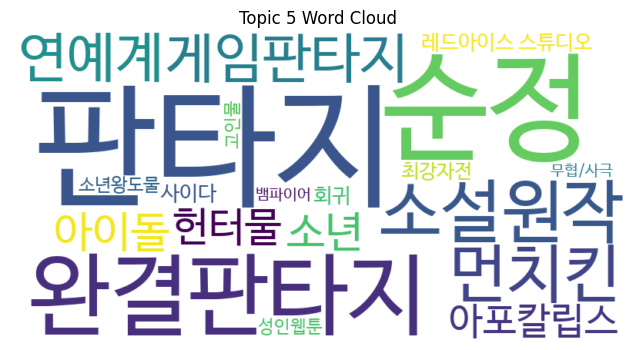

In [ ]:
for i, topic in enumerate(list_, start=1):
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path = font_path)
    
    # 단어와 가중치를 딕셔너리로 변환
    word_dict = {word: weight for weight, word in topic}
    
    # 워드 클라우드 생성
    wordcloud.generate_from_frequencies(word_dict)
    
    # 시각화
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i} Word Cloud')
    plt.axis('off')
    plt.show()

**8. hashtag 분석**

In [ ]:
df_copy.loc[df_copy['해시태그(한국)'].notnull(), '해시태그(한국)'] = df_copy.loc[df_copy['해시태그(한국)'].notnull(), '해시태그(한국)'].apply(lambda x: x.split(','))

hashtag_lists = [hashtag for hashtags in df_copy.loc[df_copy['해시태그(한국)'].notnull(), '해시태그(한국)'] for hashtag in hashtags]
print('총 해시태그 갯수:', len( hashtag_lists))

hashtag_df = pd.DataFrame(hashtag_lists, columns=['hashtag_lists'])
hashtag_df.value_counts()

총 해시태그 갯수: 1886


hashtag_lists
로맨스              179
소설원작             108
완결로맨스            100
드라마               79
판타지               71
액션                69
순정                52
스릴러               49
완결드라마             49
로판                46
완결스릴러             44
먼치킨               38
드라마&영화 원작웹툰       31
완결판타지             28
BL                26
완결액션              25
게임판타지             24
삼각관계              24
학원물               24
사이다               22
회귀                21
성인웹툰              20
아포칼립스             20
완결무료              18
연예계               16
학원로맨스             16
선결혼후연애            15
이능력배틀물            15
계약연애              15
최강자전              14
빙의                13
오피스로맨스            13
복수극               13
걸크러시              12
소년왕도물             12
하이틴               12
직업드라마             12
직진남               12
인외존재              11
2030연애            11
완결개그              10
이세계               10
개그                10
감성드라마             10
서스펜스              10
캠퍼스로맨스            10
사내연애               9